In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def show_rgb(image):
    image_rgb = cv2.cvtColor(image.astype(np.uint8), cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

In [3]:
def convolve(image, kernel):
    height, width, channels = image.shape
    k_height, k_width = kernel.shape
    image = image.astype(np.float16) #image was losing imformation without using high precision and was becoming completely non recognisable
    pad_img = np.pad(image, ((1,1), (1,1), (0,0)), mode="constant", constant_values = 0)
    output_image = np.zeros_like(image)
    for i in range(height):
        for j in range(width):
            area_to_convolve = pad_img[i:i+k_height, j:j+k_width, :]
            for c in range(channels):
                output_image[i, j, c] = np.sum(area_to_convolve[:,:,c]*kernel)
    output_image = np.clip(output_image, 0, 255)
    return output_image

In [4]:
sharpen_kernel = np.array([[ 0, -1,  0],[-1,  5, -1],[ 0, -1,  0]])
blur_kernel = np.array([[ 1/16, 1/8, 1/16],[ 1/8,  1/4, 1/8 ],[ 1/16, 1/8, 1/16]])
edge_kernel = np.array([[-1,  0,  1],[-2,  0,  2],[-1,  0,  1]])


In [5]:
def sharp(image_path):
    image = cv2.imread(image_path)
    sharp_img = convolve(image, sharpen_kernel)
    show_rgb(sharp_img)

In [6]:
def blur(image_path):
    image = cv2.imread(image_path)
    blur_img = convolve(image, blur_kernel)
    show_rgb(blur_img)


In [7]:
def edgedetect(image_path):
    image = cv2.imread(image_path)
    edge_img = convolve(image, edge_kernel)
    show_rgb(edge_img)


In [8]:
def all3(path):
    sharp(path)
    blur(path)
    edgedetect(path)


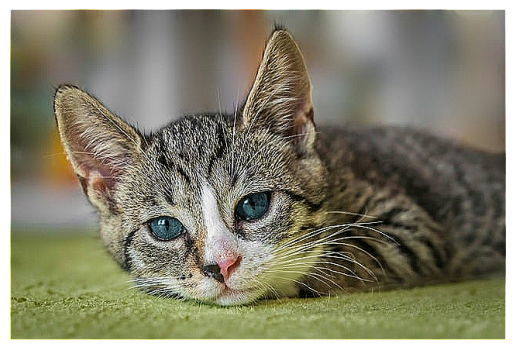

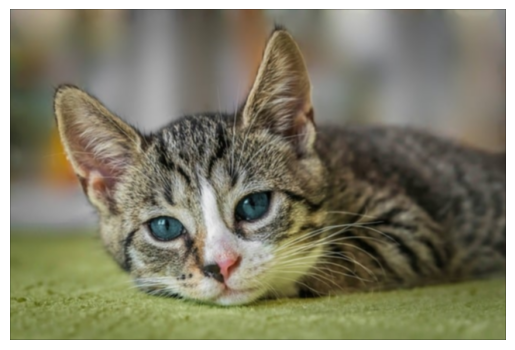

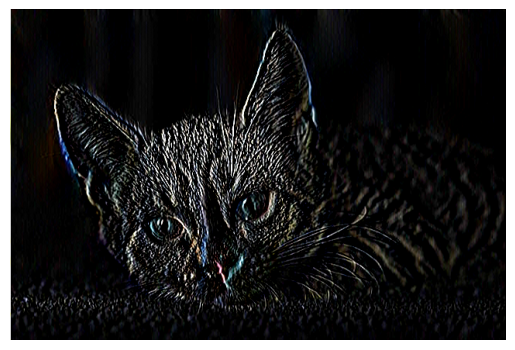

In [9]:
all3('cat.jpg')